In [1]:
import boto3
bucket_name = 'dataminds-warehouse'
s3_file_key = 'multisim_dataset.parquet'            # e.g. 'folder/myfile.txt'
local_file_path = 'multisim_dataset.parquet'        # Local destination

# Create an S3 client (remove `bucket_name` here — not a valid argument for boto3.client)
s3 = boto3.client(
    's3',
    region_name='us-east-1'
    # aws_access_key_id='your_access_key',
    # aws_secret_access_key='your_secret_key'
)

# Download the file
try:
    s3.download_file(bucket_name, s3_file_key, local_file_path)
    print(f"✅ File downloaded successfully from s3://{bucket_name}/{s3_file_key} to {local_file_path}")
except Exception as e:
    print("❌ Error downloading file:", e)

✅ File downloaded successfully from s3://dataminds-warehouse/multisim_dataset.parquet to multisim_dataset.parquet


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from xgboost import XGBClassifier

In [ ]:
df=pd.read_parquet("multisim_dataset.parquet")

In [4]:
df.head()

,telephone_number,trf,age,gndr,tenure,age_dev,dev_man,device_os_name,dev_num,is_dualsim,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
9626,iWBn_13aJO,J,50,M,6957.0,1263,Samsung,Android OS,1,1,...,0.000000,0.0,0.00,0.56,0.00,0.00,60.0,7.0,0.0,1
34347,8JWaD2wYoQ,M,52,M,1041.0,125,Samsung,Android OS,2,1,...,206.536585,0.0,0.40,0.00,0.16,0.24,156.0,0.0,2.0,1
72797,sbPnQURi3j,A,49,U,7176.0,345,Samsung,Android OS,1,1,...,0.000000,0.0,0.25,2.35,0.00,0.25,241.0,87.0,4.0,1
68025,qOy-JlqPTl,M,49,M,4309.0,466,Samsung,Android OS,1,1,...,51.885746,0.0,0.00,0.00,0.00,0.00,299.0,142.0,80.0,1
31781,MNODhcb7h0,A,50,U,6999.0,695,Samsung,Android OS,1,1,...,0.000000,0.0,0.00,0.80,0.00,0.00,121.0,96.0,0.0,1


In [5]:
df.shape

(10000, 132)

In [6]:
df.dtypes

telephone_number     object
trf                  object
age                  object
gndr                 object
tenure              float64
                     ...   
val18_6             float64
val19_6             float64
val20_6             float64
val21_6             float64
target                int64
Length: 132, dtype: object

In [7]:
df.describe()

,tenure,val2_1,val3_1,val4_1,val5_1,val6_1,val7_1,val8_1,val9_1,val10_1,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
count,9974.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9728.000000,9728.000000,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9728.000000,9728.000000,9728.000000,10000.000000
mean,3705.959996,12.236181,3.446700,83.165400,132.10566,26.930500,32.450760,10.987100,13.048270,14.784100,...,2028.914189,0.141146,8.848952e-01,1.577953e+00,3.542630e-01,4.751151e-01,185.486842,67.556127,20.955387,0.500000
std,2662.023191,16.818445,4.948314,161.116319,322.39447,61.231913,84.935862,29.115987,42.586931,37.451093,...,9118.745830,2.658871,2.040635e+00,2.878263e+00,1.045168e+00,1.238263e+00,259.493942,132.488722,49.859408,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-6.183982e-08,-1.108646e-07,-3.352761e-08,-3.576279e-08,0.000000,0.000000,0.000000,0.000000
25%,1256.250000,2.000000,1.000000,4.000000,3.37500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,37.000000,3.000000,0.000000,0.000000
50%,3022.500000,6.000000,2.000000,26.000000,31.00000,5.000000,4.500000,1.000000,0.900000,2.000000,...,0.000000,0.000000,1.500000e-01,4.400000e-01,0.000000e+00,1.072884e-08,96.000000,20.000000,4.000000,0.500000
75%,6261.000000,16.000000,4.000000,85.000000,114.00000,23.000000,23.200000,8.000000,8.000000,11.000000,...,200.062908,0.000000,9.000000e-01,2.000000e+00,3.000000e-01,4.200000e-01,223.000000,67.000000,18.000000,1.000000
max,8978.000000,325.000000,90.000000,2628.000000,6219.30000,940.000000,2176.100000,504.000000,1667.600000,567.000000,...,159548.365647,192.462886,4.920000e+01,5.918000e+01,3.464000e+01,2.886000e+01,4488.000000,1958.000000,1070.000000,1.000000


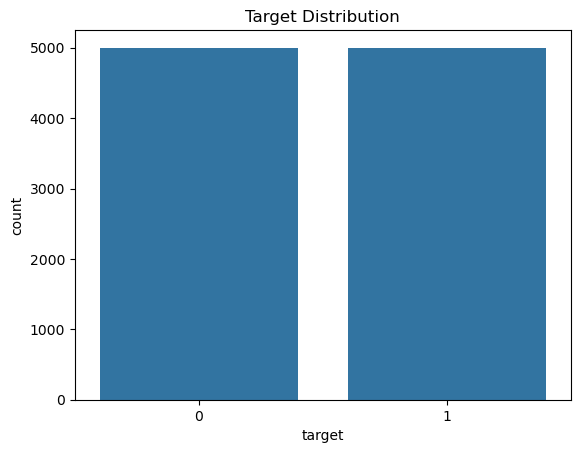

In [8]:

sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()


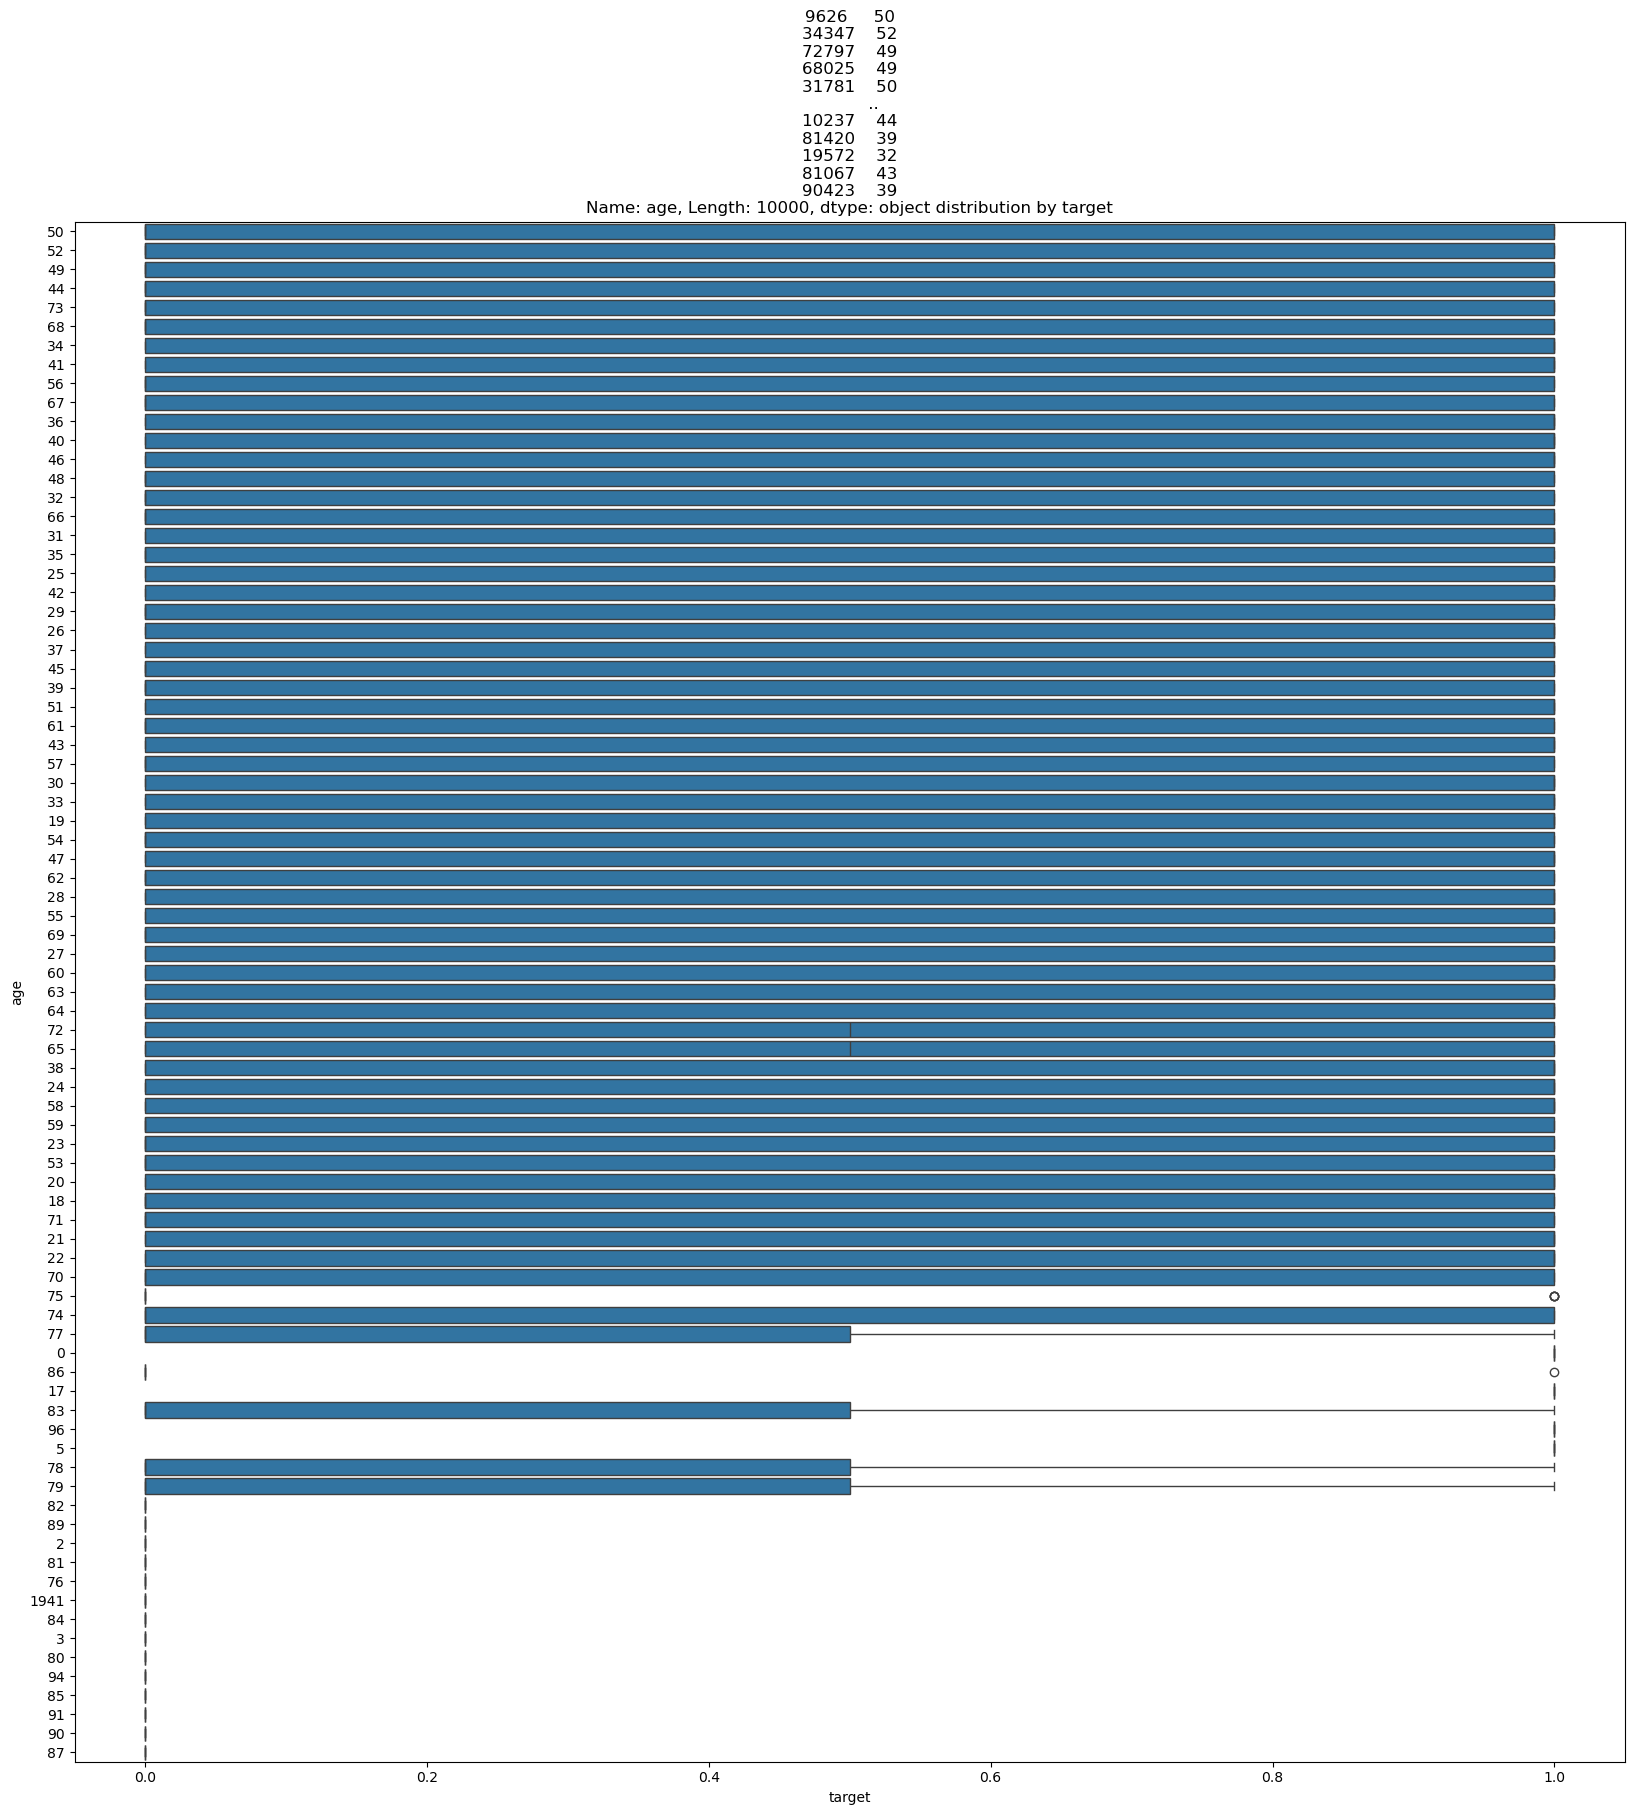

In [9]:
plt.figure(figsize= (20,20))
sns.boxplot(x='target', y=df['age'], data=df)
plt.title(f'{df['age']} distribution by target')
plt.show()

Since target column is not categorical, we need to handle floats to make it categorical

In [10]:
df['target'] = df['target'].astype(int).astype('category')

In [11]:
df['target'] = df['target'].round().astype(int).astype('category')

In [12]:
df['target'] = df['target'].astype('category')

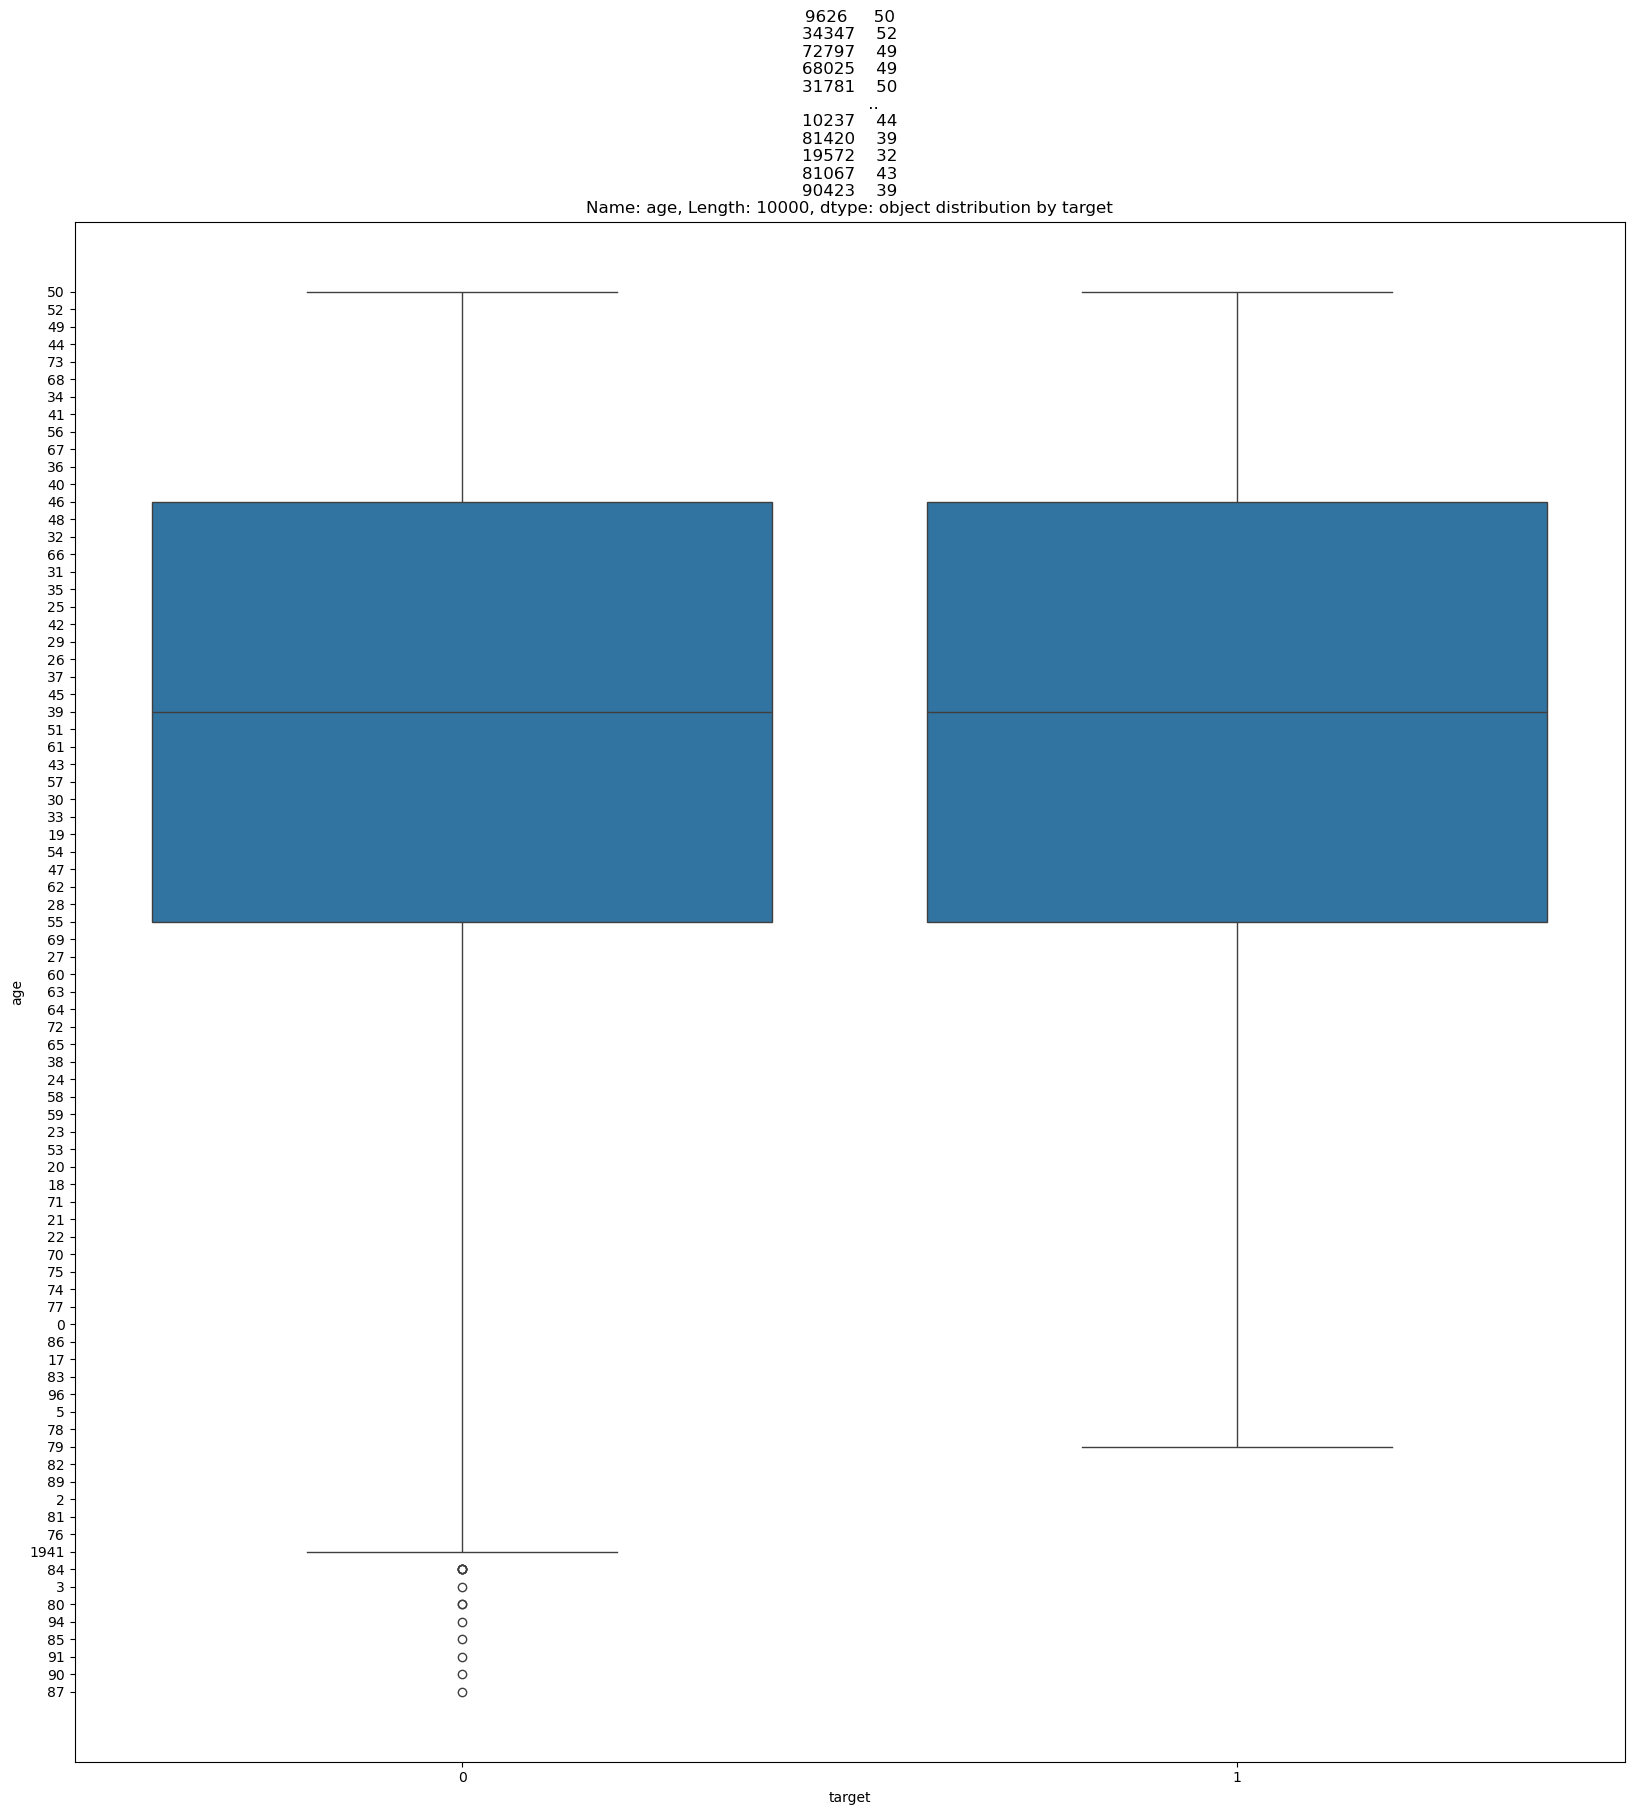

In [13]:
plt.figure(figsize= (20,20))
sns.boxplot(x='target', y=df['age'], data=df)
plt.title(f'{df['age']} distribution by target')
plt.show()

Now boxplot the outliers and distribution is clearer

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 9626 to 90423
Columns: 132 entries, telephone_number to target
dtypes: category(1), float64(111), int64(7), object(13)
memory usage: 10.1+ MB


In [15]:
df.describe(include='all')

,telephone_number,trf,age,gndr,tenure,age_dev,dev_man,device_os_name,dev_num,is_dualsim,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
count,10000,10000,9976,10000,9974.000000,9980,9980,9980,9980,10000,...,9728.000000,9728.000000,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9728.000000,9728.000000,9728.000000,10000.0
unique,9995,19,81,3,NaN,1983,77,10,24,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,h9coevfQ57,A,39,M,NaN,2860,Samsung,Android OS,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,2,3390,290,6624,NaN,126,4623,7910,6501,9177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
mean,NaN,NaN,NaN,NaN,3705.959996,NaN,NaN,NaN,NaN,NaN,...,2028.914189,0.141146,8.848952e-01,1.577953e+00,3.542630e-01,4.751151e-01,185.486842,67.556127,20.955387,NaN
std,NaN,NaN,NaN,NaN,2662.023191,NaN,NaN,NaN,NaN,NaN,...,9118.745830,2.658871,2.040635e+00,2.878263e+00,1.045168e+00,1.238263e+00,259.493942,132.488722,49.859408,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,-6.183982e-08,-1.108646e-07,-3.352761e-08,-3.576279e-08,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1256.250000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,37.000000,3.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,3022.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.500000e-01,4.400000e-01,0.000000e+00,1.072884e-08,96.000000,20.000000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,6261.000000,NaN,NaN,NaN,NaN,NaN,...,200.062908,0.000000,9.000000e-01,2.000000e+00,3.000000e-01,4.200000e-01,223.000000,67.000000,18.000000,NaN


checking for null values

In [16]:
cols_to_check = ['trf', 'age', 'gndr','tenure','age_dev','dev_man','device_os_name','dev_num','is_dualsim','is_featurephone','is_smartphone','simcard_type','region','target']
df[cols_to_check].isna().sum()

trf                  0
age                 24
gndr                 0
tenure              26
age_dev             20
dev_man             20
device_os_name      20
dev_num             20
is_dualsim           0
is_featurephone      0
is_smartphone        0
simcard_type       349
region              96
target               0
dtype: int64

In [17]:
df[cols_to_check].dtypes,

(trf                  object
 age                  object
 gndr                 object
 tenure              float64
 age_dev              object
 dev_man              object
 device_os_name       object
 dev_num              object
 is_dualsim           object
 is_featurephone      object
 is_smartphone        object
 simcard_type         object
 region               object
 target             category
 dtype: object,)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)


<class 'pandas.core.frame.DataFrame'> (8000, 131)
<class 'pandas.core.series.Series'> (8000,)


Writing the preprocessing pipeline

In [ ]:

categorical_cols = ['trf', 'age', 'gndr','age_dev','dev_man','device_os_name','dev_num','is_dualsim','is_featurephone','is_smartphone','simcard_type','region']
numeric_col = ['tenure']

In [21]:
numeric_object_pipeline = Pipeline(steps=[
    ('to_numeric', FunctionTransformer(lambda x: x.apply(pd.to_numeric, errors='coerce'))),
    ('impute', SimpleImputer(strategy='median'))
])


Since these columns are Yes or No we can use OrdinalEncoder() to convert them into 0 and 1

In [23]:
binary_cols = ['is_dualsim','is_featurephone','is_smartphone']
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

Since the following columns have some variety but not in a great amount we can use OneHotEncoder

In [24]:
multi_cat_cols = ['trf', 'gndr','dev_man','device_os_name','region']
multi_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Combining all preprocessing pipelines

In [25]:
preprocessor = ColumnTransformer([
    ('binary_cat', binary_pipeline, binary_cols),
    ('multi_cat', multi_cat_pipeline, multi_cat_cols),
    ('num', numeric_object_pipeline, numeric_col)
])

Checking if preprocessor works

In [26]:
preprocessor.fit_transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 63339 stored elements and shape (8000, 184)>

Creating a pipeline that combines preprocessor with model training

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(eval_metric='logloss'))
])

Tuning the hyperparameters

In [ ]:
param_distributions = {
    'xgb__n_estimators': randint(50, 300),          # number of trees from 50 to 299
    'xgb__max_depth': randint(3, 10),               # max tree depth from 3 to 9
    'xgb__learning_rate': uniform(0.01, 0.3),       # learning rate between 0.01 and 0.31
    'xgb__subsample': uniform(0.6, 0.4),            # subsample ratio between 0.6 and 1.0
    'xgb__colsample_bytree': uniform(0.6, 0.4)      # colsample ratio between 0.6 and 1.0
}


Searching for the best hyperparameters for the model

In [ ]:
    # or another model you use
rand_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,            # number of parameter settings sampled
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)
rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('binary_cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ordinal',
                                                                                                OrdinalEncoder())]),
                                                                               ['is_dualsim',
                                                                                'is_featurephone',
                                                                                'is_smartphone']),
                                                                              ('multi_cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot...
                                        'xgb__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb930faca40>,
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb941205a60>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb945975a60>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb9411698b0>},
                   random_state=42, scoring='accuracy', verbose=2)

Showing best hyperparameters, tuning the model and showing most important features

In [ ]:
print("Best parameters found:", rand_search.best_params_)
print("Best CV accuracy:", rand_search.best_score_)
y_pred = rand_search.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
best_model = rand_search.best_estimator_.named_steps['xgb']
print(best_model.feature_importances_)

Best parameters found: {'xgb__colsample_bytree': 0.7599443886861021, 'xgb__learning_rate': 0.023999698964084628, 'xgb__max_depth': 6, 'xgb__n_estimators': 257, 'xgb__subsample': 0.6931085361721216}
Best CV accuracy: 0.613375
Test accuracy: 0.613
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       988
           1       0.61      0.65      0.63      1012

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000

[0.01038717 0.00506517 0.00462813 0.03486741 0.00954286 0.01124606
 0.00925731 0.00613973 0.01103546 0.00990173 0.00665283 0.01213591
 0.00706753 0.00930337 0.0079824  0.01353091 0.00876685 0.
 0.         0.         0.         0.         0.01821683 0.00393972
 0.00740987 0.         0.0094921  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00968232 0.00755288 0.         0.         0.  

In [32]:
import boto3
bucket_name = 'dataminds-homeworks'
s3_file_key = 'elnama_mammadova_trainmodel.ipynb' 
local_file_path = 'elnama_mammadova_trainmodel.ipynb'

# Create an S3 client
s3 = boto3.client(
    's3'
)

# Upload the file
try:
    s3.upload_file(local_file_path, bucket_name, s3_file_key)
    print(f"File uploaded successfully to s3://{bucket_name}/{s3_file_key}")
except Exception as e:
    print("Error uploading file:", e)

 

File uploaded successfully to s3://dataminds-homeworks/elnama_mammadova_trainmodel.ipynb
